In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2022-01-25 06:16:18--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.09s   

2022-01-25 06:16:18 (262 KB/s) - ‘loan_train.csv’ saved [23101/23101]



In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [7]:
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.8-main

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2021.10.8          |   py38h06a4308_2         152 KB
    ------------------------------------------------------------
                                           Total:         152 KB

The following packages will be UPDATED:

  certifi                          2021.10.8-py38h06a4308_0 --> 2021.10.8-py38h06a4308_2



certifi-2021.10.8    | 152 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


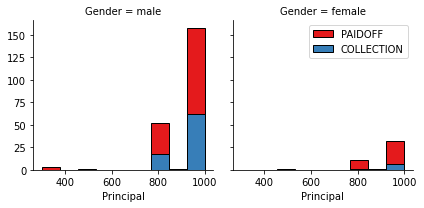

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

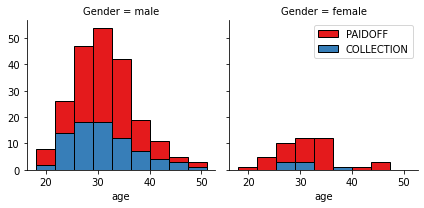

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

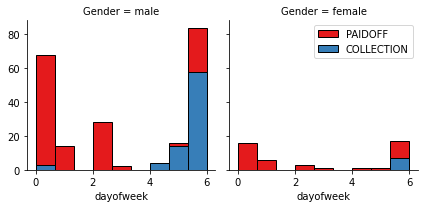

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [15]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


In [16]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [17]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [18]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [19]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

In [20]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing

In [21]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2022-01-25 06:16:55--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.09s   

2022-01-25 06:16:55 (245 KB/s) - ‘loan_train.csv’ saved [23101/23101]



In [22]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [23]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
k = 6
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=6)

In [27]:
yhat = neigh.predict(X_test)
yhat[0:5]

array(['PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [28]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8043478260869565
Test set Accuracy:  0.7142857142857143


In [29]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

ImportError: cannot import name 'jaccard_similarity_score' from 'sklearn.metrics' (/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/metrics/__init__.py)

In [30]:
print (classification_report(y_test, yhat))

NameError: name 'classification_report' is not defined

In [32]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [33]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2022-01-25 06:19:05--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.1s    

2022-01-25 06:19:06 (231 KB/s) - ‘loan_train.csv’ saved [23101/23101]



In [34]:
my_data = pd.read_csv("loan_train.csv", delimiter=",")
my_data[0:5]

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [35]:
X = my_data[['loan_status', 'Principal', 'terms', 'effective_date', 'due_date', 'age', 'education', 'Gender']].values
X[0:7]

array([['PAIDOFF', 1000, 30, '9/8/2016', '10/7/2016', 45,
        'High School or Below', 'male'],
       ['PAIDOFF', 1000, 30, '9/8/2016', '10/7/2016', 33, 'Bechalor',
        'female'],
       ['PAIDOFF', 1000, 15, '9/8/2016', '9/22/2016', 27, 'college',
        'male'],
       ['PAIDOFF', 1000, 30, '9/9/2016', '10/8/2016', 28, 'college',
        'female'],
       ['PAIDOFF', 1000, 30, '9/9/2016', '10/8/2016', 29, 'college',
        'male'],
       ['PAIDOFF', 1000, 30, '9/9/2016', '10/8/2016', 36, 'college',
        'male'],
       ['PAIDOFF', 1000, 30, '9/9/2016', '10/8/2016', 28, 'college',
        'male']], dtype=object)

In [36]:
from sklearn import preprocessing
le_loan_date = preprocessing.LabelEncoder()
le_loan_date.fit(['COLLECTION', 'PAIDOFF'])
X[:,0] = le_loan_date.transform(X[:,0]) 

le_eff_date = preprocessing.LabelEncoder()
le_eff_date.fit(['9/8/2016', '9/9/2016', '9/10/2016', '9/11/2016', '9/12/2016', '9/13/2016', '9/14/2016'])
X[:,3] = le_eff_date.transform(X[:,3]) 

le_due_date = preprocessing.LabelEncoder()
le_due_date.fit(['9/16/2016', '9/17/2016', '9/18/2016', '9/19/2016', '9/22/2016', '9/23/2016', '9/24/2016', '9/25/2016', '9/26/2016', '9/27/2016', '9/28/2016',
                 '10/7/2016', '10/8/2016', '10/9/2016', '10/10/2016', '10/11/2016', '10/12/2016', '10/13/2016', '10/25/2016', '10/26/2016', '11/9/2016', '11/10/2016', 
                 '11/12/2016'])
X[:,4] = le_due_date.transform(X[:,4]) 


le_education = preprocessing.LabelEncoder()
le_education.fit(['Bechalor', 'High School or Below', 'college', 'Master or Above'])
X[:,6] = le_education.transform(X[:,6]) 

le_Gender = preprocessing.LabelEncoder()
le_Gender.fit(['female', 'male'])
X[:,7] = le_Gender.transform(X[:,7])


X[0:7]

array([[1, 1000, 30, 5, 6, 45, 1, 1],
       [1, 1000, 30, 5, 6, 33, 0, 0],
       [1, 1000, 15, 5, 16, 27, 3, 1],
       [1, 1000, 30, 6, 7, 28, 3, 0],
       [1, 1000, 30, 6, 7, 29, 3, 1],
       [1, 1000, 30, 6, 7, 36, 3, 1],
       [1, 1000, 30, 6, 7, 28, 3, 1]], dtype=object)

In [37]:
y = my_data["loan_status"]
y[0:7]

0    PAIDOFF
1    PAIDOFF
2    PAIDOFF
3    PAIDOFF
4    PAIDOFF
5    PAIDOFF
6    PAIDOFF
Name: loan_status, dtype: object

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [40]:
X_trainset.shape
y_trainset.shape

(242,)

In [41]:
X_testset.shape
y_testset.shape

(104,)

In [42]:
LoanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
LoanTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [43]:
LoanTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [44]:
predTree = LoanTree.predict(X_testset)

In [45]:
print (predTree [0:5])
print (y_testset [0:5])

['PAIDOFF' 'PAIDOFF' 'COLLECTION' 'COLLECTION' 'PAIDOFF']
73        PAIDOFF
24        PAIDOFF
282    COLLECTION
295    COLLECTION
163       PAIDOFF
Name: loan_status, dtype: object


In [46]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  1.0


In [47]:
print (classification_report(y_test, yhat))

NameError: name 'classification_report' is not defined

In [48]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

ImportError: cannot import name 'jaccard_similarity_score' from 'sklearn.metrics' (/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/metrics/__init__.py)

In [49]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [50]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2022-01-25 06:21:01--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.09s   

2022-01-25 06:21:02 (262 KB/s) - ‘loan_train.csv’ saved [23101/23101]



In [51]:
loan_df = pd.read_csv("loan_train.csv")
loan_df.head()


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


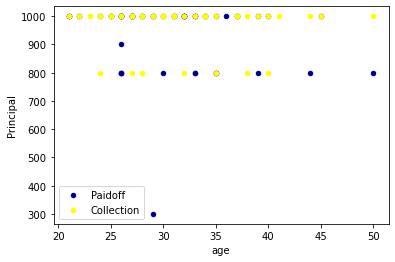

In [52]:
ax = loan_df[loan_df['loan_status'] == 'PAIDOFF'][0:50].plot(kind='scatter', x='age', y='Principal', color='DarkBlue', label='Paidoff');
loan_df[loan_df['loan_status'] == 'COLLECTION'][0:50].plot(kind='scatter', x='age', y='Principal', color='Yellow', label='Collection', ax=ax);
plt.show()

In [53]:
loan_df.dtypes

Unnamed: 0         int64
Unnamed: 0.1       int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

In [54]:
import pandas as pd 
file_handler = open("loan_train.csv", 'r')
mydata = pd.read_csv(file_handler, sep = ",") 
file_handler.close() 
gender = {'male': 1,'female': 2} 
mydata.Gender = [gender[item] for item in mydata.Gender] 
loanstatus = {'PAIDOFF': 1,'COLLECTION': 2} 
mydata.loan_status = [loanstatus[item] for item in mydata.loan_status] 
education1 = {'High School or Below': 1, 'college': 2, 'Bechalor': 3, 'Master or Above': 4}
mydata.education = [education1[item] for item in mydata.education]
print(mydata) 

     Unnamed: 0  Unnamed: 0.1  loan_status  Principal  terms effective_date  \
0             0             0            1       1000     30       9/8/2016   
1             2             2            1       1000     30       9/8/2016   
2             3             3            1       1000     15       9/8/2016   
3             4             4            1       1000     30       9/9/2016   
4             6             6            1       1000     30       9/9/2016   
..          ...           ...          ...        ...    ...            ...   
341         394           394            2        800     15      9/11/2016   
342         395           395            2       1000     30      9/11/2016   
343         397           397            2        800     15      9/12/2016   
344         398           398            2       1000     30      9/12/2016   
345         399           399            2       1000     30      9/12/2016   

       due_date  age  education  Gender  
0     10/

In [55]:
mydata.drop(mydata.columns[[5,6]], axis=1, inplace=True)

In [56]:
mydata.dtypes

Unnamed: 0      int64
Unnamed: 0.1    int64
loan_status     int64
Principal       int64
terms           int64
age             int64
education       int64
Gender          int64
dtype: object

In [57]:
feature_df = mydata[['loan_status', 'Principal', 'terms', 'age', 'education', 'Gender']]
X = np.asarray(feature_df)
X[0:5]

array([[   1, 1000,   30,   45,    1,    1],
       [   1, 1000,   30,   33,    3,    2],
       [   1, 1000,   15,   27,    2,    1],
       [   1, 1000,   30,   28,    2,    2],
       [   1, 1000,   30,   29,    2,    1]])

In [58]:
mydata['loan_status'] = mydata['loan_status'].astype('int')
y = np.asarray(mydata['loan_status'])
y [0:5]

array([1, 1, 1, 1, 1])

In [59]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 6) (276,)
Test set: (70, 6) (70,)


In [60]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [61]:
yhat = clf.predict(X_test)
yhat [0:5]

array([1, 1, 1, 1, 1])

In [62]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [63]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.79      1.00      0.88        55
           2       0.00      0.00      0.00        15

    accuracy                           0.79        70
   macro avg       0.39      0.50      0.44        70
weighted avg       0.62      0.79      0.69        70

Confusion matrix, without normalization
[[0 0]
 [0 0]]


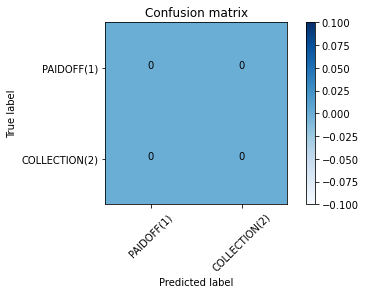

In [64]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF(1)','COLLECTION(2)'],normalize= False,  title='Confusion matrix')

In [65]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.6914285714285714

In [66]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

ImportError: cannot import name 'jaccard_similarity_score' from 'sklearn.metrics' (/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/metrics/__init__.py)

In [67]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.79      1.00      0.88        55
           2       0.00      0.00      0.00        15

    accuracy                           0.79        70
   macro avg       0.39      0.50      0.44        70
weighted avg       0.62      0.79      0.69        70



Decision Tree

In [68]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [69]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2022-01-25 06:25:16--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.09s   

2022-01-25 06:25:17 (263 KB/s) - ‘loan_train.csv’ saved [23101/23101]



In [70]:
my_data = pd.read_csv("loan_train.csv", delimiter=",")
my_data[0:5]

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [71]:
X = my_data[['loan_status', 'Principal', 'terms', 'effective_date', 'due_date', 'age', 'education', 'Gender']].values
X[0:7]

array([['PAIDOFF', 1000, 30, '9/8/2016', '10/7/2016', 45,
        'High School or Below', 'male'],
       ['PAIDOFF', 1000, 30, '9/8/2016', '10/7/2016', 33, 'Bechalor',
        'female'],
       ['PAIDOFF', 1000, 15, '9/8/2016', '9/22/2016', 27, 'college',
        'male'],
       ['PAIDOFF', 1000, 30, '9/9/2016', '10/8/2016', 28, 'college',
        'female'],
       ['PAIDOFF', 1000, 30, '9/9/2016', '10/8/2016', 29, 'college',
        'male'],
       ['PAIDOFF', 1000, 30, '9/9/2016', '10/8/2016', 36, 'college',
        'male'],
       ['PAIDOFF', 1000, 30, '9/9/2016', '10/8/2016', 28, 'college',
        'male']], dtype=object)

In [72]:
from sklearn import preprocessing
le_loan_date = preprocessing.LabelEncoder()
le_loan_date.fit(['COLLECTION', 'PAIDOFF'])
X[:,0] = le_loan_date.transform(X[:,0]) 

le_eff_date = preprocessing.LabelEncoder()
le_eff_date.fit(['9/8/2016', '9/9/2016', '9/10/2016', '9/11/2016', '9/12/2016', '9/13/2016', '9/14/2016'])
X[:,3] = le_eff_date.transform(X[:,3]) 

le_due_date = preprocessing.LabelEncoder()
le_due_date.fit(['9/16/2016', '9/17/2016', '9/18/2016', '9/19/2016', '9/22/2016', '9/23/2016', '9/24/2016', '9/25/2016', '9/26/2016', '9/27/2016', '9/28/2016',
                 '10/7/2016', '10/8/2016', '10/9/2016', '10/10/2016', '10/11/2016', '10/12/2016', '10/13/2016', '10/25/2016', '10/26/2016', '11/9/2016', '11/10/2016', 
                 '11/12/2016'])
X[:,4] = le_due_date.transform(X[:,4]) 


le_education = preprocessing.LabelEncoder()
le_education.fit(['Bechalor', 'High School or Below', 'college', 'Master or Above'])
X[:,6] = le_education.transform(X[:,6]) 

le_Gender = preprocessing.LabelEncoder()
le_Gender.fit(['female', 'male'])
X[:,7] = le_Gender.transform(X[:,7])


X[0:7]

array([[1, 1000, 30, 5, 6, 45, 1, 1],
       [1, 1000, 30, 5, 6, 33, 0, 0],
       [1, 1000, 15, 5, 16, 27, 3, 1],
       [1, 1000, 30, 6, 7, 28, 3, 0],
       [1, 1000, 30, 6, 7, 29, 3, 1],
       [1, 1000, 30, 6, 7, 36, 3, 1],
       [1, 1000, 30, 6, 7, 28, 3, 1]], dtype=object)

In [73]:
y = my_data["loan_status"]
y[0:7]

0    PAIDOFF
1    PAIDOFF
2    PAIDOFF
3    PAIDOFF
4    PAIDOFF
5    PAIDOFF
6    PAIDOFF
Name: loan_status, dtype: object

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [76]:
X_trainset.shape
y_trainset.shape

(242,)

In [77]:
X_testset.shape
y_testset.shape

(104,)

In [78]:
LoanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
LoanTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [79]:
LoanTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [80]:
predTree = LoanTree.predict(X_testset)

In [81]:
print (predTree [0:5])
print (y_testset [0:5])

['PAIDOFF' 'PAIDOFF' 'COLLECTION' 'COLLECTION' 'PAIDOFF']
73        PAIDOFF
24        PAIDOFF
282    COLLECTION
295    COLLECTION
163       PAIDOFF
Name: loan_status, dtype: object


In [82]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  1.0


In [83]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.79      1.00      0.88        55
           2       0.00      0.00      0.00        15

    accuracy                           0.79        70
   macro avg       0.39      0.50      0.44        70
weighted avg       0.62      0.79      0.69        70



/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [84]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

ImportError: cannot import name 'jaccard_similarity_score' from 'sklearn.metrics' (/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/metrics/__init__.py)

Support Vector Machine

In [86]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [87]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2022-01-25 06:27:20--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.1s    

2022-01-25 06:27:21 (231 KB/s) - ‘loan_train.csv’ saved [23101/23101]



In [88]:
loan_df = pd.read_csv("loan_train.csv")
loan_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


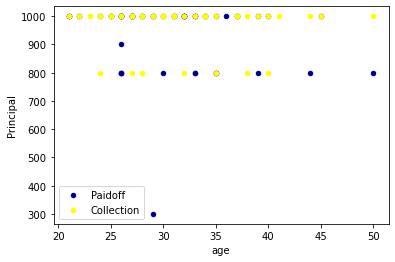

In [89]:
ax = loan_df[loan_df['loan_status'] == 'PAIDOFF'][0:50].plot(kind='scatter', x='age', y='Principal', color='DarkBlue', label='Paidoff');
loan_df[loan_df['loan_status'] == 'COLLECTION'][0:50].plot(kind='scatter', x='age', y='Principal', color='Yellow', label='Collection', ax=ax);
plt.show()

In [90]:
loan_df.dtypes

Unnamed: 0         int64
Unnamed: 0.1       int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

In [91]:
import pandas as pd 
file_handler = open("loan_train.csv", 'r')
mydata = pd.read_csv(file_handler, sep = ",") 
file_handler.close() 
gender = {'male': 1,'female': 2} 
mydata.Gender = [gender[item] for item in mydata.Gender] 
loanstatus = {'PAIDOFF': 1,'COLLECTION': 2} 
mydata.loan_status = [loanstatus[item] for item in mydata.loan_status] 
education1 = {'High School or Below': 1, 'college': 2, 'Bechalor': 3, 'Master or Above': 4}
mydata.education = [education1[item] for item in mydata.education]
print(mydata) 

     Unnamed: 0  Unnamed: 0.1  loan_status  Principal  terms effective_date  \
0             0             0            1       1000     30       9/8/2016   
1             2             2            1       1000     30       9/8/2016   
2             3             3            1       1000     15       9/8/2016   
3             4             4            1       1000     30       9/9/2016   
4             6             6            1       1000     30       9/9/2016   
..          ...           ...          ...        ...    ...            ...   
341         394           394            2        800     15      9/11/2016   
342         395           395            2       1000     30      9/11/2016   
343         397           397            2        800     15      9/12/2016   
344         398           398            2       1000     30      9/12/2016   
345         399           399            2       1000     30      9/12/2016   

       due_date  age  education  Gender  
0     10/

In [92]:
mydata.drop(mydata.columns[[5,6]], axis=1, inplace=True)

In [93]:
mydata.dtypes

Unnamed: 0      int64
Unnamed: 0.1    int64
loan_status     int64
Principal       int64
terms           int64
age             int64
education       int64
Gender          int64
dtype: object

In [94]:
feature_df = mydata[['loan_status', 'Principal', 'terms', 'age', 'education', 'Gender']]
X = np.asarray(feature_df)
X[0:5]

array([[   1, 1000,   30,   45,    1,    1],
       [   1, 1000,   30,   33,    3,    2],
       [   1, 1000,   15,   27,    2,    1],
       [   1, 1000,   30,   28,    2,    2],
       [   1, 1000,   30,   29,    2,    1]])

In [95]:
mydata['loan_status'] = mydata['loan_status'].astype('int')
y = np.asarray(mydata['loan_status'])
y [0:5]

array([1, 1, 1, 1, 1])

In [96]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 6) (276,)
Test set: (70, 6) (70,)


In [97]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [98]:
yhat = clf.predict(X_test)
yhat [0:5]

array([1, 1, 1, 1, 1])

In [99]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [100]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.79      1.00      0.88        55
           2       0.00      0.00      0.00        15

    accuracy                           0.79        70
   macro avg       0.39      0.50      0.44        70
weighted avg       0.62      0.79      0.69        70

Confusion matrix, without normalization
[[0 0]
 [0 0]]


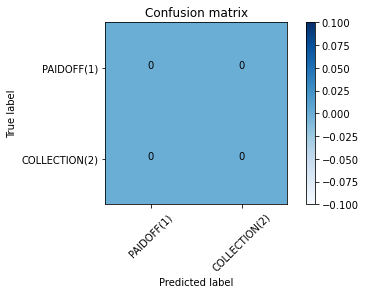

In [101]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF(1)','COLLECTION(2)'],normalize= False,  title='Confusion matrix')

In [102]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.6914285714285714

In [103]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

ImportError: cannot import name 'jaccard_similarity_score' from 'sklearn.metrics' (/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/metrics/__init__.py)

Logistic Regression

In [104]:
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [105]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2022-01-25 06:29:36--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.09s   

2022-01-25 06:29:37 (245 KB/s) - ‘loan_train.csv’ saved [23101/23101]



In [106]:
loan_df = pd.read_csv("loan_train.csv")
loan_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [107]:
import pandas as pd 
gender = {'male': 1,'female': 2} 
loan_df.Gender = [gender[item] for item in loan_df.Gender] 
loanstatus = {'PAIDOFF': 1,'COLLECTION': 2} 
loan_df.loan_status = [loanstatus[item] for item in loan_df.loan_status] 
education1 = {'High School or Below': 1, 'college': 2, 'Bechalor': 3, 'Master or Above': 4}
loan_df.education = [education1[item] for item in loan_df.education]
loan_df.drop(loan_df.columns[[5,6]], axis=1, inplace=True)
print(loan_df) 

     Unnamed: 0  Unnamed: 0.1  loan_status  Principal  terms  age  education  \
0             0             0            1       1000     30   45          1   
1             2             2            1       1000     30   33          3   
2             3             3            1       1000     15   27          2   
3             4             4            1       1000     30   28          2   
4             6             6            1       1000     30   29          2   
..          ...           ...          ...        ...    ...  ...        ...   
341         394           394            2        800     15   32          1   
342         395           395            2       1000     30   25          1   
343         397           397            2        800     15   39          2   
344         398           398            2       1000     30   28          2   
345         399           399            2       1000     30   26          2   

     Gender  
0         1  
1         2

In [108]:
loan_df.dtypes

Unnamed: 0      int64
Unnamed: 0.1    int64
loan_status     int64
Principal       int64
terms           int64
age             int64
education       int64
Gender          int64
dtype: object

In [109]:
X = np.asarray(loan_df[['Principal', 'terms', 'age', 'education', 'Gender']])
X[0:5]

array([[1000,   30,   45,    1,    1],
       [1000,   30,   33,    3,    2],
       [1000,   15,   27,    2,    1],
       [1000,   30,   28,    2,    2],
       [1000,   30,   29,    2,    1]])

In [110]:
y = np.asarray(loan_df['loan_status'])
y [0:5]

array([1, 1, 1, 1, 1])

In [111]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.52,  0.92,  2.33, -1.  , -0.42],
       [ 0.52,  0.92,  0.34,  1.84,  2.38],
       [ 0.52, -0.96, -0.65,  0.42, -0.42],
       [ 0.52,  0.92, -0.49,  0.42,  2.38],
       [ 0.52,  0.92, -0.32,  0.42, -0.42]])

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 5) (276,)
Test set: (70, 5) (70,)


In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [115]:
yhat = LR.predict(X_test)
yhat

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [116]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.56, 0.44],
       [0.62, 0.38],
       [0.6 , 0.4 ],
       [0.55, 0.45],
       [0.58, 0.42],
       [0.59, 0.41],
       [0.58, 0.42],
       [0.59, 0.41],
       [0.55, 0.45],
       [0.58, 0.42],
       [0.56, 0.44],
       [0.57, 0.43],
       [0.68, 0.32],
       [0.56, 0.44],
       [0.63, 0.37],
       [0.66, 0.34],
       [0.54, 0.46],
       [0.6 , 0.4 ],
       [0.56, 0.44],
       [0.58, 0.42],
       [0.63, 0.37],
       [0.57, 0.43],
       [0.55, 0.45],
       [0.61, 0.39],
       [0.67, 0.33],
       [0.56, 0.44],
       [0.56, 0.44],
       [0.7 , 0.3 ],
       [0.56, 0.44],
       [0.67, 0.33],
       [0.6 , 0.4 ],
       [0.61, 0.39],
       [0.61, 0.39],
       [0.58, 0.42],
       [0.68, 0.32],
       [0.61, 0.39],
       [0.56, 0.44],
       [0.62, 0.38],
       [0.62, 0.38],
       [0.61, 0.39],
       [0.56, 0.44],
       [0.58, 0.42],
       [0.62, 0.38],
       [0.56, 0.44],
       [0.6 , 0.4 ],
       [0.57, 0.43],
       [0.6 , 0.4 ],
       [0.57,

In [117]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

ImportError: cannot import name 'jaccard_similarity_score' from 'sklearn.metrics' (/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/metrics/__init__.py)

In [118]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[55  0]
 [ 0  0]]


Confusion matrix, without normalization
[[55  0]
 [ 0  0]]


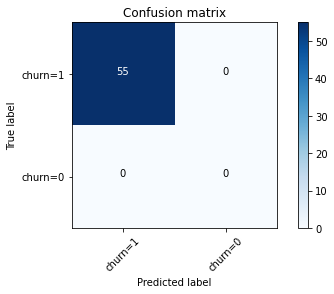

In [119]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)



plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [120]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.79      1.00      0.88        55
           2       0.00      0.00      0.00        15

    accuracy                           0.79        70
   macro avg       0.39      0.50      0.44        70
weighted avg       0.62      0.79      0.69        70



/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [121]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6009771839994061

Model Evaluation using Test set

In [122]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

ImportError: cannot import name 'jaccard_similarity_score' from 'sklearn.metrics' (/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/metrics/__init__.py)

In [123]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2022-01-25 06:45:34--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2022-01-25 06:45:34 (47.5 MB/s) - ‘loan_test.csv’ saved [3642/3642]



Load Test set for evaluation

In [124]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male
